In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# 회귀 예측을 할 때는 Feature가 target과 얼마나 많은 영향이 있는지 파악
#  예를 들어 아파트 가격은 면적의 영향을 제일 많이 받는다.
# Target과의 상관관계가 높을 수록 예측에 있어 중요한 Feature가 된다.

np.abs(boston_df.corr()['PRICE']).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

In [6]:
boston_df.corr()['PRICE'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64

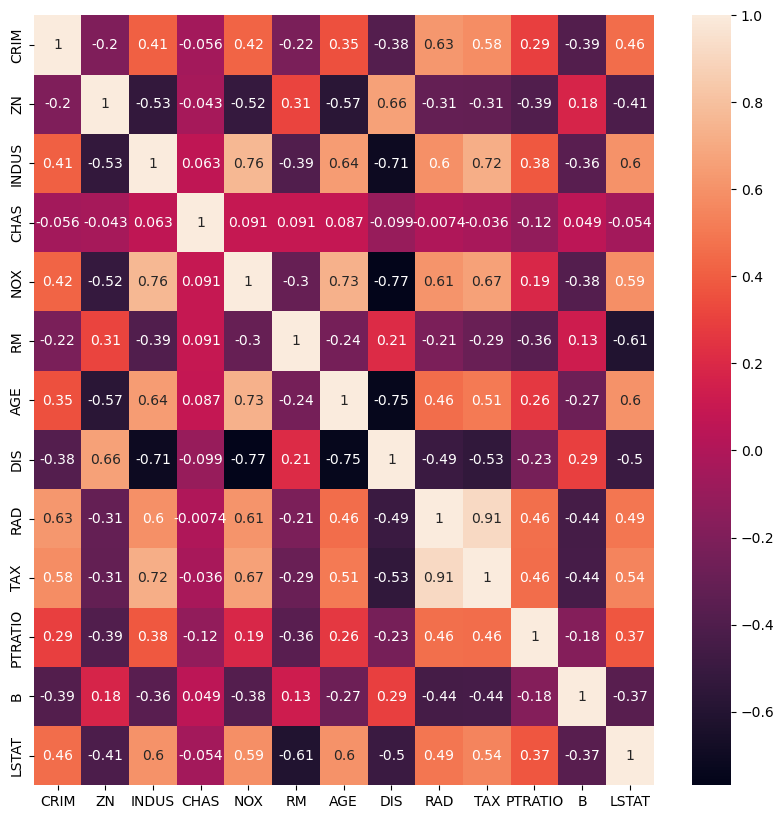

In [7]:
# Feature 끼리의 상관성을 확인 - 너무 강한 상관성을 가진 데이터 확인( 다중공선성 확인 )
plt.figure(figsize=(10, 10))

corr_df = boston_df.drop('PRICE', axis=1).corr()
sns.heatmap(
    data=corr_df,
    annot=True
)

plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop('PRICE', axis=1),
    boston_df['PRICE'],
    test_size=0.2,
    random_state=42
)

In [9]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr_reg.predict(X_test)
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [ ]:
# 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mse) # 데이터에 대한 손실(실질적인 오차)
print(rmse) # mse의 루트(설명을 하기 위한 값)
print(r2) # 정확도

24.291119474973613
4.928602182665346
0.6687594935356307


## [참고] Standard Scaling 사용하기
- 선형 모델은 기본적으로 Feature의 스케일의 영향을 많이 받는다.
- 따라서 모든 Feature의 스케일을 하나로 통일하여 입력하면 선형 모델의 성능이 증가할 가능성이 있다.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
boston_scaled = scaler.fit_transform(X_train)

In [14]:
boston_scaled[:3]

array([[ 1.28770177, -0.50032012,  1.03323679, -0.27808871,  0.48925206,
        -1.42806858,  1.02801516, -0.80217296,  1.70689143,  1.57843444,
         0.84534281, -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, -0.27808871, -0.15723342,
        -0.68008655, -0.43119908,  0.32434893, -0.62435988, -0.58464788,
         1.20474139,  0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, -0.27808871, -1.00872286,
        -0.40206304, -1.6185989 ,  1.3306972 , -0.97404758, -0.60272378,
        -0.63717631,  0.06529747, -0.65159505]])

In [16]:
lr_reg_scaled = LinearRegression().fit(boston_scaled, y_train)
lr_reg_scaled

LinearRegression()

In [17]:
### 절대로 테스트 데이터에 대한 Transformer를 생성하지 않는다. ###
# 테스트 세트의 변황는 훈련 세트로 구해진 통계값을 이용해서 변환한다.
scaled_test = scaler.transform(X_test) # 테스트 세트는 무조건 transform만 한다.

y_scaled_pred = lr_reg_scaled.predict(scaled_test)

In [18]:
mse = mean_squared_error(y_test, y_scaled_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_scaled_pred)

print("MSE : {:.3f}".format(mse))
print("RMSE : {:.3f}".format(rmse))
print("R2 : {:.3f}".format(r2))

MSE : 24.291
RMSE : 4.929
R2 : 0.669


In [24]:
#다항 회귀
from sklearn.preprocessing import PolynomialFeatures

In [25]:
sample = np.arange(6).reshape(3, 2)
sample

array([[0, 1],
       [2, 3],
       [4, 5]])

In [26]:
poly = PolynomialFeatures(degree=2) # degree 옵션을 이용해서 n차항 추가

sample_ftr = poly.fit_transform(sample)
sample_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [29]:
# 다항회귀를 사용한 보스턴 주택가격 데이터 세트 예측
boston_poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = boston_poly.fit_transform(X_train)
X_train_poly.shape

(404, 104)

In [30]:
X_train.shape

(404, 13)

In [31]:
lr_reg_poly = LinearRegression().fit(X_train_poly, y_train)

In [32]:
# 테스트 세트 변환
X_test_poly = boston_poly.transform(X_test)
X_test_poly.shape

(102, 104)

In [35]:
y_test_pred = lr_reg_poly.predict(X_test_poly)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2  = r2_score(y_test, y_test_pred)

print("Test MSE : {:.3f}".format(test_mse))
print("Test RMSE : {:.3f}".format(test_rmse))
print("Test R2 : {:.3f}".format(test_r2))

Test MSE : 14.257
Test RMSE : 3.776
Test R2 : 0.806


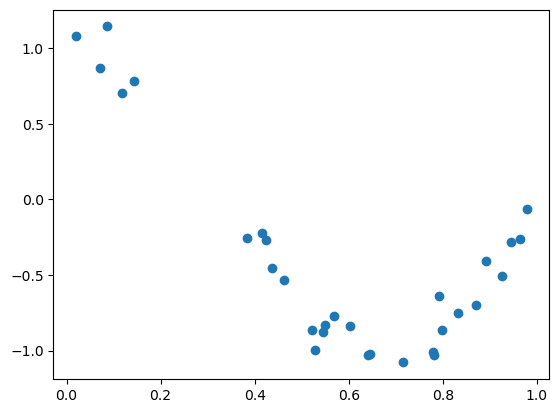

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y)
plt.show()